In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import matplotlib.pyplot as plt

# Membuat Dataset
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes'],
    'Credit_Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair'],
    'Buy': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

df = pd.DataFrame(data)

In [2]:
def calculate_entropy(y):
    probs = y.value_counts(normalize=True)
    return -sum(probs * np.log2(probs))

total_entropy = calculate_entropy(df['Buy'])
print(f"Total Entropy (Target): {total_entropy:.4f}")

Total Entropy (Target): 0.9710


In [3]:
# Encoding Data
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

X = df_encoded.drop('Buy', axis=1)
y = df_encoded['Buy']

# Membangun Model
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


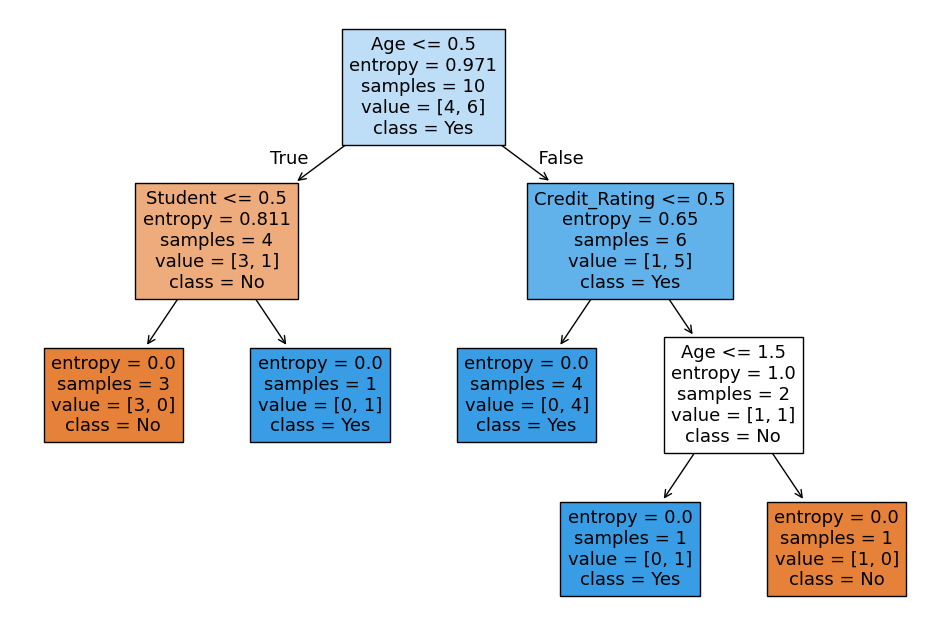

In [4]:
plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()